In [16]:
#imports
import glob
import pickle
from tqdm.notebook import tqdm
import os
import subprocess
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [5]:
#PATHs

USER = "leila" #change the user 
TRACER ="pbr28"
DATA_ROOT = "/autofs/space/simba_001/users/PBR28_KOALA/data/PET"
WORKING_PROCESSED_DATA_PATH = f"/autofs/space/celer_001/users/{USER}/working_{TRACER}"
WINDOWS_SHARED_DATA_PATH =  f"/autofs/space/celer_001/users/{USER}/{TRACER}"
PICKLE_SAVE_PATH = f"{WORKING_PROCESSED_DATA_PATH}/pickles"
FINAL_DATA_PATH_FOR_MODEL = f"/autofs/space/celer_001/users/{USER}/data/{TRACER}"

In [20]:
# PARAMS
RECONSTRUCTION_ALGORITHM = "OP"
TIME_TRIAL = "3600-180"
PATIENT_ID = "PBRKOA_HC011_090518"
TRIAL_NAME = f"{TIME_TRIAL}_{RECONSTRUCTION_ALGORITHM}"


## Low Count First 3 Minutes

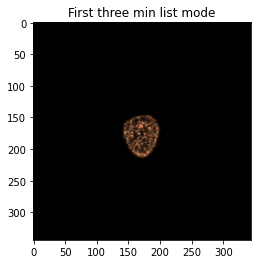

In [56]:
slice = 25

sample_pet_recon = f"{FINAL_DATA_PATH_FOR_MODEL}/{PATIENT_ID}/pet_nifti/{TRIAL_NAME}.nii.gz"
recon_img = nib.load(sample_pet_recon).get_fdata()
plt.title("First three min list mode")
recon_img = np.rot90(recon_img)
plt.imshow(recon_img[:, :, slice], cmap="copper")
plt.show()

# Ground Truth

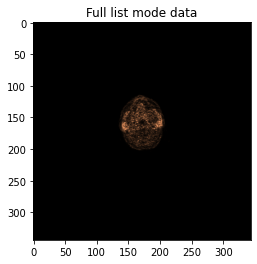

In [49]:
ground_truth_niftys = glob.glob(f"{DATA_ROOT}/{PATIENT_ID}/PET/PET_60-90_SUV.nii.gz")
gt_img = nb.load(ground_truth_niftys[0]).get_fdata()
gt_img = gt_img.squeeze()
gt_img = np.rot90(gt_img)
plt.title("Full list mode data")
# plt.imshow(gt_img[:,:, int(slice * (len(gt_img) / len(recon_img)) )], cmap="copper")
plt.imshow(gt_img[:,:, 32], cmap="copper")

plt.show()